6) Create an appropriate visualization to show the distribution of profiles.

7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

8) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

9) Produce suitable charts to illustrate your results and export them in your project folder.

# Importing Libraries

In [1]:
# Importing libraries - will need visualizations for this task
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.ticker as mtick

## Creating a path to the .pkl file

In [2]:
path = r'C:\Users\mmoss\20-12-2021 Instacart Basket Analysis'

## 1. Importing the .pkl file

In [3]:
df_data_merged_A = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_Data_Merged_A.pkl'))

In [4]:
top_10_selling_items = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'top_10_selling_items.pkl'))

# Bar chart of the most popular products

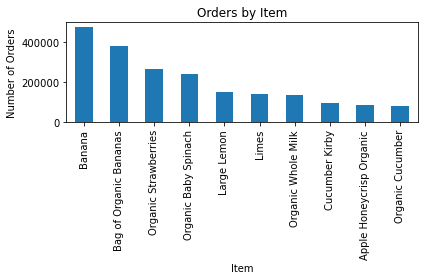

In [5]:
# Creating top 10 selling items bar chart
bar_top_10_selling_items = top_10_selling_items['product_name'].value_counts().plot.bar()
plt.ylabel('Number of Orders')
plt.xlabel('Item')
plt.title('Orders by Item')
plt.tight_layout()

In [6]:
# Export top 10 selling items
bar_top_10_selling_items.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_10_selling_items.png'))

## Department frequency and sales

In [7]:
#Lets see the head of the data
pd.set_option("display.max_columns", None)
df_data_merged_A.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,average_price,spending_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,max_order,exclude_flag,age_group,income_range,parental_status,selling_performance
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Regularly busy,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Regularly busy,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products


Let's check the departments to see high frequency and product orders

Need to give each department id a string.

In [8]:
# Import department data 
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [9]:
#Display
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


Need to transpose it

In [10]:
# Transpose the table
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [11]:
# Creating new column for department names 


df_data_merged_A.loc[df_data_merged_A['department_id'] == 1, 'department_name'] = 'frozen'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 2, 'department_name'] = 'other'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 3, 'department_name'] = 'bakery'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 4, 'department_name'] = 'produce'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 5, 'department_name'] = 'alcohol'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 6, 'department_name'] = 'international'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 7, 'department_name'] = 'beverages'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 8, 'department_name'] = 'pets'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 9, 'department_name'] = 'dry goods pasta'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 10, 'department_name'] = 'bulk'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 11, 'department_name'] = 'personal care'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 12, 'department_name'] = 'meat seafood'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 13, 'department_name'] = 'pantry'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 14, 'department_name'] = 'breakfast'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 15, 'department_name'] = 'canned goods'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 16, 'department_name'] = 'dairy eggs'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 17, 'department_name'] = 'households'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 18, 'department_name'] = 'babies'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 19, 'department_name'] = 'snacks'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 20, 'department_name'] = 'deli'
df_data_merged_A.loc[df_data_merged_A['department_id'] == 21, 'department_name'] = 'missing'

In [12]:
# Test
df_data_merged_A['department_name'].value_counts()

produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

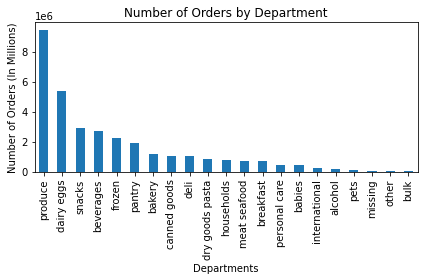

In [13]:
# Create visual to show which departments sell the most
top_selling_departments_bar = df_data_merged_A['department_name'].value_counts().plot.bar()
plt.ylabel('Number of Orders (In Millions)')
plt.xlabel('Departments')
plt.title('Number of Orders by Department')
plt.tight_layout()

In [14]:
# Export top selling departments
top_selling_departments_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_selling_departments.png'))

Top 5 departments are produce, eggs, snacks, beverages and frozen. 

In [15]:
# Check to see how much of sales these departments make of total sales.
dept_sales = df_data_merged_A.groupby('department_name').agg({'prices':['sum']})

In [16]:
#copy it to excel where we can get the total
dept_sales.to_clipboard()

These 5 departments make up a total of 68% of all the departments sales. Good information for the marketing department. I will use these 5 departments going forward on other customer profiles to see if we can come up with a marketing strategy for the marketing department. Going to flag these departments as high performing departments.

In [17]:
high_performing_department = []

for value in df_data_merged_A["department_name"]:
  if value == 'produce':
    high_performing_department.append("High Performing Department")
  elif value == 'dairy eggs':
    high_performing_department.append("High Performing Department")
  elif value == 'snacks':
    high_performing_department.append("High Performing Department")
  elif value == 'beverages':
    high_performing_department.append("High Performing Department")
  elif value == 'frozen':
    high_performing_department.append("High Performing Department")
  else:
    high_performing_department.append("Non-High Performing Department")

In [18]:
# Testing it
high_performing_department

['High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'Non-High Performing Department',
 'Non-High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',
 'High Performing Department',


In [19]:
# Creating a new column
df_data_merged_A['department_performance'] = high_performing_department

In [20]:
# Testing it
df_data_merged_A.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,average_price,spending_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,max_order,exclude_flag,age_group,income_range,parental_status,selling_performance,department_name,department_performance
0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products,beverages,High Performing Department
1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products,beverages,High Performing Department
2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products,beverages,High Performing Department
3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Regularly busy,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products,beverages,High Performing Department
4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Regularly busy,Fewest orders,6.367797,Low Spender,Female,Alabama,31,2/17/2019,3,married,40423,South,10,Non-Low Activity Customer,31-40,009950-040525,parent,Other Products,beverages,High Performing Department


In [21]:
# Creating a subset with only these departments
df_data_merged_A_2 = df_data_merged_A[df_data_merged_A['department_performance']=="High Performing Department"]

In [22]:
# Check the results
df_data_merged_A_2['department_performance'].value_counts()

High Performing Department    22683327
Name: department_performance, dtype: int64

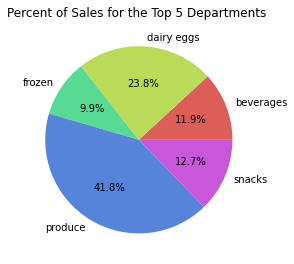

In [143]:
# Check to see % of sales each department has out of the top 5 departments.
pie_department_name = df_data_merged_A_2['department_name'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('hls', 5))
plt.tight_layout()
plt.ylabel('')
plt.title('Percent of Sales for the Top 5 Departments ')
plt.subplots_adjust(top=0.85)

In [144]:
# Exporting the pie chart
pie_department_name.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_department_name.png'))

## Times and days of the week

In [25]:
# # Write for loop to flag 

result_day = []

for value in df_data_merged_A['orders_day_of_week']:
    if value == 0:
        result_day.append('Saturday')
    elif value == 1:
        result_day.append('Sunday')
    elif value == 2:
        result_day.append('Monday')
    elif value == 3:
        result_day.append('Tuesday')
    elif value == 4:
        result_day.append('Wednesday')
    elif value == 5:
        result_day.append('Thursday')
    elif value == 6:
        result_day.append('Friday')

In [26]:
## Adding new column
df_data_merged_A['Day_of_Week'] = result_day

In [27]:
# Testing it
df_data_merged_A['Day_of_Week'].value_counts()

Saturday     6203329
Sunday       5659298
Friday       4495887
Monday       4213105
Thursday     4205076
Tuesday      3839865
Wednesday    3783172
Name: Day_of_Week, dtype: int64

In [28]:
# Dividing up times of the day
result_part_of_day = []

for value in df_data_merged_A_2['order_hour_of_day']:
    if (value >= 6) and (value  <= 11):
        result_part_of_day.append('Morning')
    elif (value >= 12) and (value  <= 16):
        result_part_of_day.append('Afternoon')
    else:
        result_part_of_day.append("Evening")
        

In [29]:
# Testing it
result_part_of_day

['Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Evening',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning'

In [30]:
#Creating a new column
df_data_merged_A_2['Time_of_Day'] = result_part_of_day

C:\Users\mmoss\AppData\Local\Temp/ipykernel_34860/4278430898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_merged_A_2['Time_of_Day'] = result_part_of_day


In [31]:
# Testing it
df_data_merged_A_2['Time_of_Day'].value_counts()

Afternoon    9176678
Morning      7644535
Evening      5862114
Name: Time_of_Day, dtype: int64

# 6. Create an appropriate visualization to show the distribution of profiles.

# A) Age

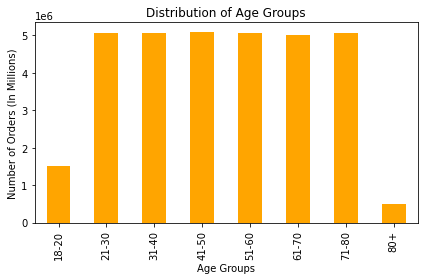

In [32]:
# Going to use a bar chart because it groups the number of customers into age group categories.
age_bar_2 = df_data_merged_A['age_group'].value_counts().sort_index().plot.bar(color = "orange")
plt.ylabel('Number of Orders (In Millions)')
plt.xlabel('Age Groups')
plt.title('Distribution of Age Groups')
plt.tight_layout()

This graph indicates that the age groups 18-20 and 80+ can be removed from marketing strategies.

In [33]:
# Export the graph
age_bar_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_bar_23.png'))

## QUESTION 5A) 

## Does the information suggest any patterns between age and certain types of goods?

In [34]:
# Crosstab for department name and age group 
dept_name_age = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['age_group'], dropna = False)

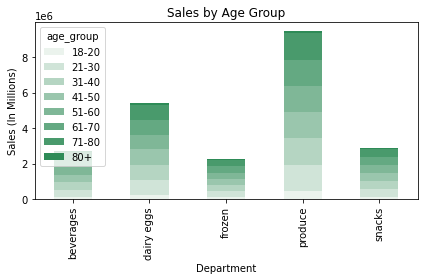

In [35]:
bar_dept_name_age = dept_name_age.plot.bar(stacked = True, color = sns.light_palette("seagreen", 8))
plt.legend(title = 'age_group', loc='upper left')
plt.title('Sales by Age Group')
plt.xlabel('Department')
plt.ylabel('Sales (In Millions)')
plt.tight_layout()

Not a huge difference in age group here either appears very uniform across the age groups.

In [36]:
# Export the graph
bar_dept_name_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_age.png'))

## Are certain age groups high spenders?

In [37]:
# crosstab age and spending flag
age_spending = pd.crosstab(df_data_merged_A['age_group'], df_data_merged_A['spending_flag'], dropna = False)

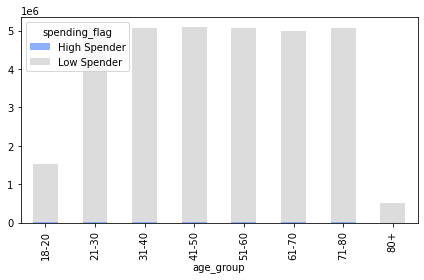

In [38]:
# bar chart age and spending flag
bar_age_spending = age_spending.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.legend(title = 'spending_flag',loc='upper left')
plt.tight_layout()

No.

In [39]:
# Export the graph
bar_age_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_high_spender.png'))

# B) Income

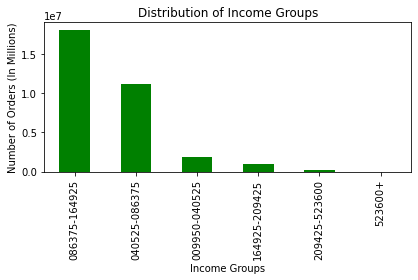

In [40]:
# Going to use a bar chart because it groups the number of customers into income group categories.
income_bar = df_data_merged_A['income_range'].value_counts().plot.bar(color = "green")
plt.ylabel('Number of Orders (In Millions)')
plt.xlabel('Income Groups')
plt.title('Distribution of Income Groups')
plt.tight_layout()


In [41]:
# Export the graph
income_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_bar.png'))

## QUESTION 5B)
## Does the information suggest any patterns between income and certain types of goods?

In [42]:
# Crosstab for department name and income group 
dept_name_income = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['income_range'], dropna = False)

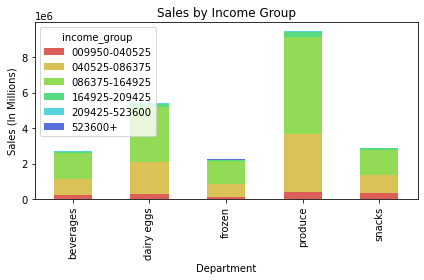

In [43]:
bar_dept_name_income = dept_name_income.plot.bar(stacked = True, color = sns.color_palette('hls', 8))
plt.legend(title = 'income_group', loc='upper left')
plt.title('Sales by Income Group')
plt.xlabel('Department')
plt.ylabel('Sales (In Millions)')
plt.tight_layout()


Customers who make $40,000 - $170,000 make up the majority of these items and should be the targeted by the marketing department.

In [44]:
# Export the graph
bar_dept_name_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_income.png'))

# C) Number of dependants

Text(0.5, 1.0, 'Distribution of Customers with Dependants')

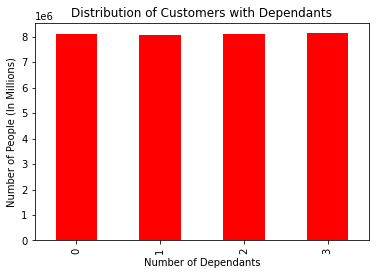

In [145]:
# Going to use a bar chart because it groups the number of dependents into categories.
age_bar = df_data_merged_A['number_of_dependants'].value_counts().sort_index().plot.bar(color = "red")
plt.ylabel('Number of People (In Millions)')
plt.xlabel('Number of Dependants')
plt.title('Distribution of Customers with Dependants')

In [146]:
# Export the graph
age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','number_of_dependants.png'))

## Do customers with different number of dependants have different spending habits?


In [47]:
# crosstab number of dependants and spending flag
number_of_dependants_spending_flag = pd.crosstab(df_data_merged_A['number_of_dependants'], df_data_merged_A['spending_flag'], dropna = False)

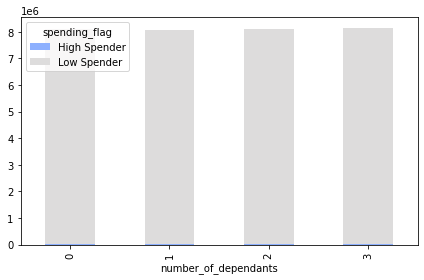

In [48]:
# bar chart number of dependants and spending flag
bar_number_of_dependants_spending_flag  = number_of_dependants_spending_flag .plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.legend(title = 'spending_flag',loc='upper left')
plt.tight_layout()

In [49]:
# Export the graph
bar_number_of_dependants_spending_flag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','number_of_dependants_high_spender.png'))

No.

## QUESTION 5C)

## Is there a connection between the number of dependants a customer has and certain types of goods?

In [50]:
# Crosstab for department name and number of dependants
dept_name_dependants = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['number_of_dependants'], dropna = False)

Text(36.625, 0.5, 'Sales (In Millions)')

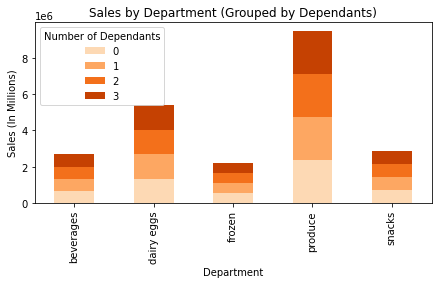

In [51]:
bar_dept_name_dependants = dept_name_dependants.plot.bar(stacked = True, color = sns.color_palette('Oranges', 4))
plt.legend(title = 'Number of Dependants', loc='upper left')
plt.tight_layout()
plt.title('Sales by Department (Grouped by Dependants)')
plt.xlabel('Department')
plt.ylabel('Sales (In Millions)')

Dependants don't have a big impact on department sales. Pretty uniform.

In [52]:
# Export the graph
bar_dept_name_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_dependants.png'))

# D) Parental_Status

Text(0.5, 1.0, 'Distribution of Parents and Non-Parents')

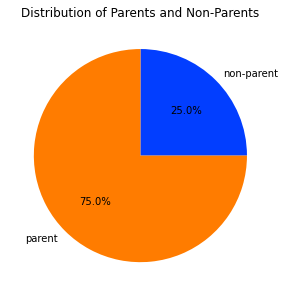

In [53]:
pie_parental_status = df_data_merged_A['parental_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('bright'))
plt.tight_layout()
plt.ylabel('')
plt.title('Distribution of Parents and Non-Parents')

## QUESTION 5D)

## Does the information suggest any patterns between parental status and certain types of goods?

In [54]:
# Crosstab for department name and number of dependants
dept_name_parental_status = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['parental_status'], dropna = False)

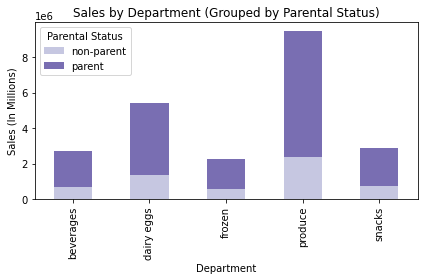

In [55]:
bar_dept_name_parental_status = dept_name_parental_status.plot.bar(stacked = True, color = sns.color_palette('Purples', 2))
plt.legend(title = 'Parental Status', loc='upper left')
plt.title('Sales by Department (Grouped by Parental Status)')
plt.xlabel('Department')
plt.ylabel('Sales (In Millions)')
plt.tight_layout()

The marketing team should be targeting parents in their campaigns. 

In [56]:
# Export the graph
bar_dept_name_parental_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_parental_status.png'))

# E) Family Status

## QUESTION 5E)

## Does the information suggest any patterns between family status and ordering habits?¶

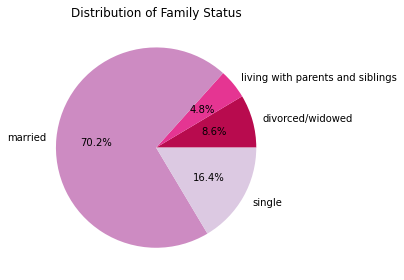

In [57]:
pie_family_status = df_data_merged_A['marital_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('PuRd_r', 4))
plt.ylabel('')
plt.title('Distribution of Family Status')
plt.tight_layout()

In [58]:
# Export the graph
pie_family_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_family_status.png'))

In [59]:
# Crosstab for family status and department 
family_status_department = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['marital_status'], dropna = False)

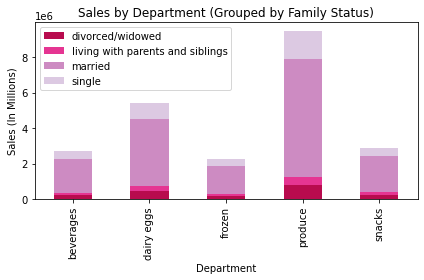

In [60]:
# Create visual for family status and department name
bar_family_status_department = family_status_department.sort_index().plot(kind = 'bar', stacked = True, color = sns.color_palette('PuRd_r', 4))
plt.legend(loc='upper left')
plt.title('Sales by Department (Grouped by Family Status)')
plt.xlabel('Department')
plt.ylabel('Sales (In Millions)')
plt.tight_layout()

In [61]:
df_data_merged_A['marital_status'].value_counts()

married                             22753055
single                               5324920
divorced/widowed                     2771355
living with parents and siblings     1550402
Name: marital_status, dtype: int64

Married folks make up the majority of our customers and they should be targeted by our marketing team.

In [62]:
# Export the graph
bar_family_status_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_family_status.png'))

# F) TIME

## What are the busiest times of day?

Text(0, 0.5, 'Number of Orders (In Millions)')

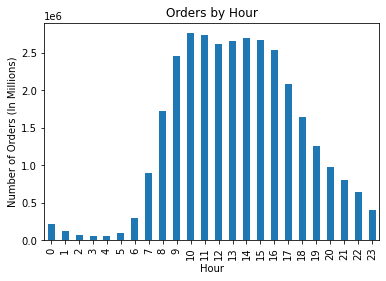

In [63]:
# Busiest hours of the day
bar_busiest_hour = df_data_merged_A['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders (In Millions)')

In [64]:
# Export busiest hours of the day
bar_busiest_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_busiest_hour.png'))

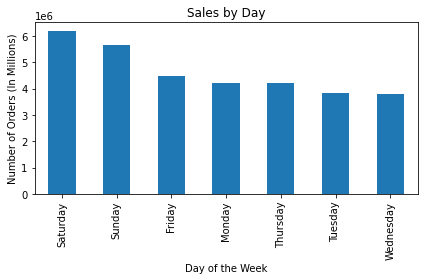

In [65]:
# Busiest day of the week
bar_busiest_day_of_week = df_data_merged_A['Day_of_Week'].value_counts().plot.bar()
plt.title('Sales by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders (In Millions)')
plt.tight_layout()

In [66]:
# Export the graph
bar_busiest_day_of_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_day_of_week.png'))

## Is there a connection between time of day and certain items ordered in departments?

In [67]:
# Crosstab for department name and for part of the day visualization
dept_name_part_day = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['Time_of_Day'], dropna = False)

Text(0, 0.5, '')

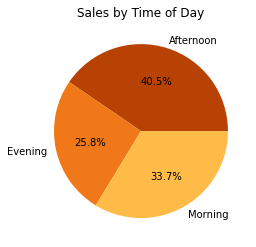

In [132]:
# Making bar chart
pie_part_of_day = df_data_merged_A_2['Time_of_Day'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('YlOrBr_r', 4))

plt.xticks(rotation= 20, horizontalalignment="center")
plt.title('Sales by Time of Day')
plt.xlabel('')
plt.ylabel('')


In [134]:
# Export the graph
pie_part_of_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_part_day.png'))

Most sales occur in the afternoon and morning so marketers should target customers for that time.

## Is there a connection between day of the week and products purchased?

In [70]:
# Crosstab for department name and weekday visualization
dept_name_weekday = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A['Day_of_Week'], dropna = False)

Text(0, 0.5, 'Number of Orders (In Millions)')

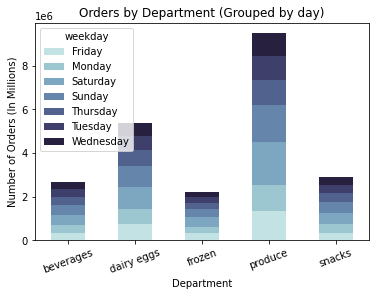

In [71]:
bar_dept_name_weekday = dept_name_weekday.plot.bar(stacked = True, color  = sns.color_palette("ch:start=.2,rot=-.3", 7))
plt.legend(title = 'weekday',loc='upper left')
plt.xticks(rotation= 20, horizontalalignment="center")
plt.title('Orders by Department (Grouped by day)')
plt.xlabel('Department')
plt.ylabel('Number of Orders (In Millions)')

No connection seems pretty uniform.

In [72]:
# Export the graph
bar_dept_name_weekday.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_weekday.png'))

# G) Prices of Products

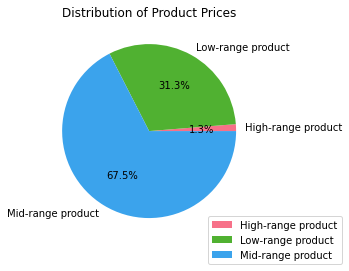

In [73]:
# show prices
pie_product_price = df_data_merged_A['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette("husl", 3))
plt.title('Distribution of Product Prices')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(0.75, 0))


In [74]:
# Export the graph
pie_product_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','product_prices_pie.png'))

## How do prices map on to the departments?

In [75]:
# crosstab them
departments_price_categories = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['price_range_loc'], dropna = False)

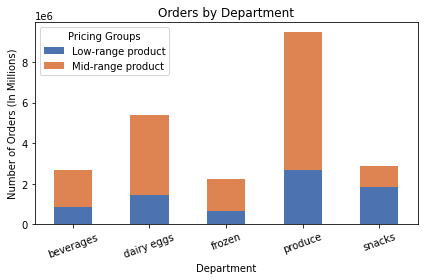

In [76]:
# bar chart departments and pricing groups
bar_departments_price_groups = departments_price_categories.plot(kind = 'bar', stacked = True, color = sns.color_palette('deep', 2))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.legend(title = 'Pricing Groups',loc='upper left')
plt.title('Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders (In Millions)')
plt.tight_layout()

In [77]:
# Export the graph
bar_departments_price_groups.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_pricing_groups.png'))

In [78]:
df_data_merged_A['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      412551
Name: price_range_loc, dtype: int64

Very little high range products. Could include some in produce to increase profit? Or turn some low-range into medium?

## What products do high and low spenders buy?

In [79]:
# crosstab them
spending_flag_price_range = pd.crosstab(df_data_merged_A_2['spending_flag'], df_data_merged_A_2['price_range_loc'], dropna = False)

Text(27.0, 0.5, 'Number of Orders (In Tens of Millions)')

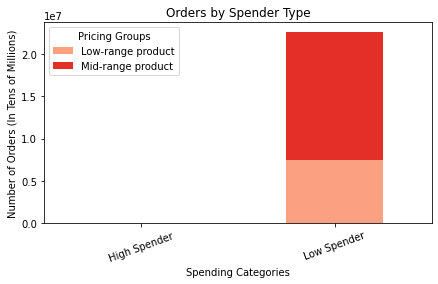

In [80]:
# bar chart spending flag and price ranges
spending_flag_price_range = spending_flag_price_range.plot(kind = 'bar', stacked = True, color = sns.color_palette("Reds", 2))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()
plt.legend(title = 'Pricing Groups',loc='upper left')
plt.title('Orders by Spender Type')
plt.xlabel('Spending Categories')
plt.ylabel('Number of Orders (In Tens of Millions)')

In [81]:
# Export chart
spending_flag_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_flag_price_range.png'))

# H) Gender

In [82]:
## Create piechart of gender of orders
df_data_merged_A['gender'].value_counts()

Male      16312444
Female    16087288
Name: gender, dtype: int64

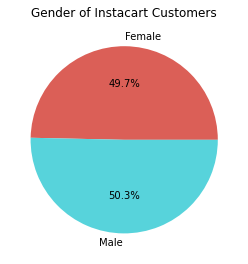

In [147]:
# Make the piechart
gender_pie = df_data_merged_A['gender'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette("hls",2))
plt.ylabel('')
plt.tight_layout()
plt.title('Gender of Instacart Customers')
plt.subplots_adjust(top=0.85)

In [148]:
# Export chart
gender_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender_distribution.png'))

## How does gender map on to the departments

In [85]:
# crosstab them
departments_genders = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['gender'], dropna = False)

Text(36.625, 0.5, 'Number of Orders (In Tens of Millions)')

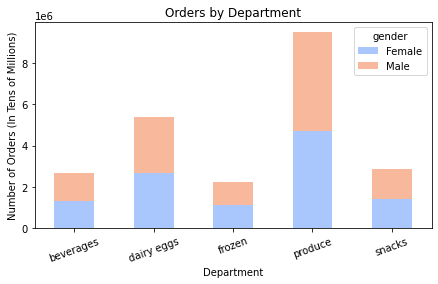

In [86]:
# Make the bar chart
bar_departments_by_gender = departments_genders.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 2))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()
plt.title('Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders (In Tens of Millions)')

In [87]:
# Export chart
bar_departments_by_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender_departments.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [88]:
# Aggregating age and price
agg_age_price = df_data_merged_A.groupby('age_group').agg({'prices':['min', 'max', 'mean']})

In [89]:
# Aggregating age and order number
agg_age_order_number = df_data_merged_A.groupby('age_group').agg({'order_number':['min', 'max', 'mean']})

In [90]:
# Aggregating Income Range and price
agg_income_price = df_data_merged_A.groupby('income_range').agg({'prices':['min', 'max', 'mean']})

In [91]:
# Aggregating Income Range and order number
agg_income_order_number = df_data_merged_A.groupby('income_range').agg({'order_number':['min', 'max', 'mean']})

In [92]:
# Aggregating Number of Dependants and prices
agg_number_of_dependants_price = df_data_merged_A.groupby('number_of_dependants').agg({'prices':['min', 'max', 'mean']})

In [93]:
# Aggregating Number of Dependants and order number
agg_number_of_dependants_order_number = df_data_merged_A.groupby('number_of_dependants').agg({'order_number':['min', 'max', 'mean']})

In [94]:
# Aggregating Parental Status and price
agg_parental_price = df_data_merged_A.groupby('parental_status').agg({'prices':['min', 'max', 'mean']})

In [95]:
# Aggregating Parental Status and order number
agg_parental_order_number = df_data_merged_A.groupby('parental_status').agg({'order_number':['min', 'max', 'mean']})

In [96]:
# Aggregating Family Status and price
agg_family_status_price = df_data_merged_A.groupby('marital_status').agg({'prices':['min', 'max', 'mean']})

In [97]:
# Aggregating Family Status and order number
agg_family_status_order_number = df_data_merged_A.groupby('marital_status').agg({'order_number':['min', 'max', 'mean']})

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [98]:
df_data_merged_A['region'].value_counts()

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: region, dtype: int64

In [99]:
# Getting orders by region
orders_by_region = df_data_merged_A['region'].value_counts()

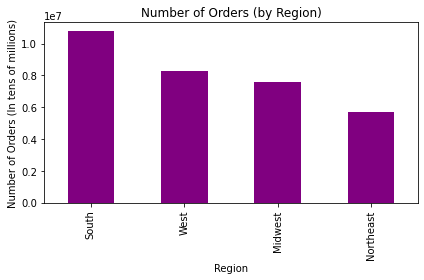

In [100]:
bar_orders_by_region = orders_by_region.plot.bar(stacked = True, color = "purple")
plt.title('Number of Orders (by Region)')
plt.xlabel('Region')
plt.ylabel('Number of Orders (In tens of millions)')
plt.tight_layout()

Most orders occur in the South. Marketers may want to know this.

In [101]:
# Export the graph
bar_orders_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_by_region.png'))

## Key Quesion : How much of each top 5 departments are ordered by each region?

In [102]:
#crosstab them
region_department = pd.crosstab(df_data_merged_A_2['department_name'], df_data_merged_A_2['region'], dropna = False)

Text(0, 0.5, 'Number of Orders (In Millions)')

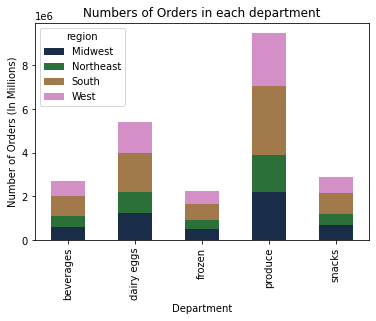

In [103]:
bar_orders_by_department_region = region_department.plot.bar(stacked = True, color = sns.color_palette("cubehelix", 5))
plt.title('Numbers of Orders in each department')
plt.xlabel('Department')
plt.ylabel('Number of Orders (In Millions)')

The south and west make up a majority of the produce department. Can see other distributions from this chart. 

In [104]:
# Export the graph
bar_orders_by_department_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_by_region_and_department.png'))

## Key Question: How much of each Instacart age group is represented by the regions?

In [105]:
#crosstab them
agegroup_regions = pd.crosstab(df_data_merged_A['age_group'], df_data_merged_A['region'], dropna = False)

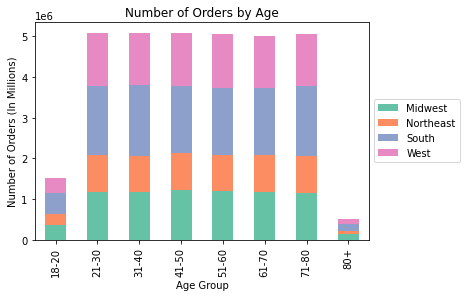

In [106]:
# Create bar chart
bar_orders_by_age_region = agegroup_regions.plot.bar(stacked = True, color = sns.color_palette("Set2", 4))
plt.title('Number of Orders by Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders (In Millions)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [107]:
# Export the graph
bar_orders_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_by_age_group_and_region.png'))

## Key Question: How much of each Instacart Income Group is represented by the regions?

In [108]:
#crosstab them
incomegroup_regions = pd.crosstab(df_data_merged_A['income_range'], df_data_merged_A['region'], dropna = False)

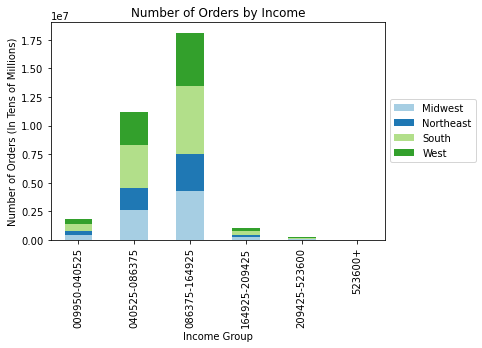

In [109]:
# Create bar chart
bar_orders_by_income_region = incomegroup_regions.plot.bar(stacked = True, color = sns.color_palette("Paired", 4))
plt.title('Number of Orders by Income')
plt.xlabel('Income Group')
plt.ylabel('Number of Orders (In Tens of Millions)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

A good portion of the 40k - 107k customers is made up of people from the south and the west.

## Additional Key Question: What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [110]:
# Code for the Loyal Customer
df_data_merged_A.loc[df_data_merged_A['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [111]:
# Code for Regular Customer
df_data_merged_A.loc[(df_data_merged_A['max_order'] <= 40) & (df_data_merged_A['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [112]:
# Code for New Customer
df_data_merged_A.loc[df_data_merged_A['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [113]:
# Checking frequencies of all the customer types
df_data_merged_A['loyalty_flag'].value_counts(dropna = False)

Regular customer    15874128
Loyal customer      10282763
New customer         6242841
Name: loyalty_flag, dtype: int64

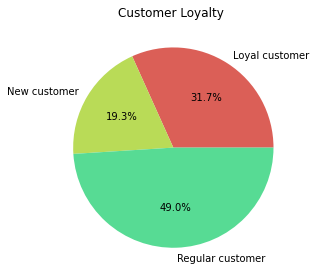

In [114]:
# Make pie chart of loyalty_flag (how many orders customers have made)
pie_loyalty = df_data_merged_A['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('hls', 5))
plt.ylabel('')
plt.title('Customer Loyalty ')
plt.tight_layout()

## Additional Key Question: Are there differences in ordering habits based on a customer’s loyalty status?

In [115]:
# Cross the loyalty and spending flags
customer_loyalty_spending = pd.crosstab(df_data_merged_A['loyalty_flag'], df_data_merged_A['spending_flag'], dropna = False)

(0.0, 300000.0)

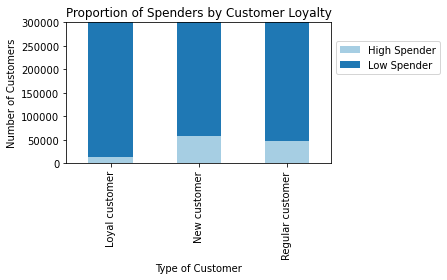

In [116]:
# Create bar chart
bar_loyalty_spending = customer_loyalty_spending.plot.bar(stacked = True, color = sns.color_palette("Paired", 4))
plt.title('Proportion of Spenders by Customer Loyalty')
plt.xlabel('Type of Customer')
plt.ylabel('Number of Customers')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.tight_layout()
plt.ylim(0,300000)

In [117]:
# Export the graph
bar_loyalty_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spending_loyalty_2.png'))

In [118]:
df_data_merged_A['spending_flag'].value_counts()

Low Spender     32280045
High Spender      119687
Name: spending_flag, dtype: int64

## Additional Key Questions: What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

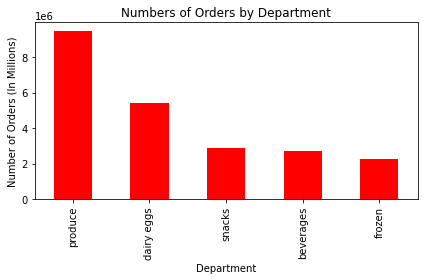

In [135]:
# Create bar chart
bar_top_five_dept = df_data_merged_A_2['department_name'].value_counts().plot.bar( color = "red")
plt.title('Numbers of Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders (In Millions)')
plt.tight_layout()

In [136]:
# Export the graph
bar_top_five_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_five_departments.png'))

In [121]:
# Export the graph
pie_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_loyalty.png'))

In [122]:
# Export the graph
bar_orders_by_income_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_by_income_group_and_region.png'))

In [123]:
# Export latest note book
df_data_merged_A_2.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_B.pkl'))